BloomTech Data Science

*Unit 2, Sprint 1, Module 4*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Libraries for today's project
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Part 1: Sprint Challenge Practice

- Can I import a CSV file into a DataFrame?
- Can I create a scatter plot?
- Can I split a DataFrame into a target vector and feature matrix?
- Can I split a dataset into a training set and a test set?
- Can I establish the baseline mean absolute error for a regression problem?
- Can I combine transformers with a predictor using a pipeline?
- Can I build a linear regresion model and a ridge regression model?
- Can I evaluate a model using common metrics like mean absolute error, root mean squared error, and R^2?
- If given a feature matrix, can I use my model to create a list of predictions?
- Can I create a horizontal bar chart with the coefficients from a linear model?

# Part 2: Pipelines and Plotting

Let's revise [our work from yesterday](https://tinyurl.com/yb9cz6n5).

# Part 3: Logistic Regression

# I. Wrangle Data

In [15]:
def wrangle(filepath):
  df = pd.read_csv(filepath, index_col=['PassengerId'])
  df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
  df['Pclass'] = df['Pclass'].astype('object')
  return df

#THE FIRST SPLIT IS DONE ALREADY
train_file = DATA_PATH+'titanic/train.csv'
test_file = DATA_PATH+'titanic/test.csv'

#MUST ALWAYS WRANGLE TRAIN AND TEST IDENTICALLY
df = wrangle(train_file)
X_test = wrangle(test_file) #THE SURVIVED COLUMN HAS BEEN REMOVED (PART OF KAGGLE COMPETITION)

In [17]:
print(list(df.columns)); print()
print(list(X_test.columns)); print()

df.isnull().sum()

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']



Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

## II. Split Data

In [18]:
target = 'Survived'
y=df[target]
X=df.drop(columns=target)

Since there's no time series component, we should do a randomized train-validation split.

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## III. Establish our baseline

- This is a **classification problem**, so we look at the **majority class** to calculate baseline **accuracy score**.

In [35]:
print( pd.DataFrame(y_train.value_counts(normalize=True)*100) )
baseline_accuracy = (y_train.value_counts(normalize=True)*100).max()

    Survived
0  62.359551
1  37.640449


## IV. Build Model

- Why would regular linear regression not work here?

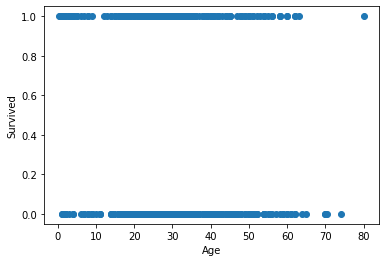

In [36]:
plt.scatter(X_train['Age'], y_train)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

We fit the data to a sigmoid function with beta parameters

This function returns a probability value and you need to determine the **decision bound**: the level at which something is categorized as 0 or 1, default to 0.5

Logistic Regression can be used for more than 2 classifications by converting the target to multiple binary values 

What we need for our model pipeline:

- `OneHotEncoder`
- `SimpleImputer`: **Fills in null values**
- `StandardScaler`: **Convert every feature to the same scale so that large numbers do not dominate**
- `LogisticRegression`

In [ ]:
from sklearn.pipeline import make_pipeline

In [39]:
model_log = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    LogisticRegression()
)
model_log.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Pclass', 'Sex', 'Embarked'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## V. Check Metrics

**We can't use MAE or R2 Score**

**We use an accuracy metric based on the percentage of correctly predicted**

In [41]:
print("Training Accuracy:", model_log.score(X_train, y_train))
print("Validation Accuracy:", model_log.score(X_val,y_val))

Training Accuracy: 0.8075842696629213
Validation Accuracy: 0.7988826815642458


In [43]:
#PREDICTIONS
y_pred = model_log.predict(X_test)

#PROBABILITIES
y_pred_prob = model_log.predict_proba(X_test)
#Gives an Nested Array of [Probability of Classification 1, Probability of Classification 2]